In [262]:
# Data Cleaning with Pandas

In [263]:
import numpy as np
import pandas as pd

import math

from datetime import datetime

In [264]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [266]:
# standard missing values terlihat sebagai NaN
# bisa kita hitung, cek, hapus dropna, fillna

# hitung
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [267]:
# kita bisa import datanya lalu kasih tau pandas kalau ada value2 lain yang juga dianggap missing values

# import ulang data
# kali ini dengan tambahan opsi missing values lainnya

df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
                    na_values=["--", "na", "n/a", " "])
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [268]:
# hitung
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [270]:
# NUM_BATH tidak punya tipe data numerik, kita tau kalau ada yang salah isi disana

# cek baris per baris
index = 0
for baris in df["NUM_BATH"]:
    # print("index", index)
    # print(baris, type(baris))
    try:
        print(float(baris))
    except ValueError:
        # print("ini data bukan numerik", baris)
        # kalau bukan numerik ubah jadi NaN
        df.iloc[index, 5] = np.NaN

    print()
    index += 1


1.0

1.5

1.0

nan

2.0

1.0


1.0

2.0



In [271]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      7 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [273]:
df["NUM_BATH"] = pd.to_numeric(df["NUM_BATH"])

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      7 non-null      float64
 6   SQ_FT         7 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [275]:
# fill in missing values

# pakai drop datanya terlalu banyak dibuang
df.dropna()

# jadi kita "fill" saja data yang tidak terisi
# biar tidak terlalu jauh dari data asli, kita fill menggunakan mean, median, atau mode

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0


In [276]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [277]:
# untuk PID yang angka urut, kita buatkan loop untuk isi semua missing values nya dengan value kotak sebelumnya + 1000
index  = 0
for baris in df["PID"]:
    if (math.isnan(baris)):
        df.iloc[index, 0] = df.iloc[index-1, 0] + 1000

    index += 1

In [278]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [279]:
# untuk ST_NUM kita isi dengan rata-rata

st_mean = df["ST_NUM"].mean()
st_mean = int(st_mean)

df["ST_NUM"].fillna(st_mean, inplace=True)

In [280]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,191.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,191.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [281]:
# hapus dulu data yang numerik, harusnya isi kolom ini cuma Y dan N

index = 0
for baris in df["OWN_OCCUPIED"]:
    if (baris != "N" and baris != "Y"):
        df.iloc[index, 3] = np.NaN
    index += 1

In [282]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,191.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,191.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [283]:
# kita isi U untuk contoh kali ini
df["OWN_OCCUPIED"] = df["OWN_OCCUPIED"].fillna("U")

In [284]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,191.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,191.0,WASHINGTON,U,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [285]:
# isi missing value di NUM_BEDROOMS dengan median
median_bedroom = df["NUM_BEDROOMS"].median()

df["NUM_BEDROOMS"] = df["NUM_BEDROOMS"].fillna(median_bedroom)

In [286]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,191.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,191.0,WASHINGTON,U,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [287]:
# isi missing value di NUM_BEDROOMS dengan mode

mode_bathroom = df["NUM_BATH"].mode()[0]

df["NUM_BATH"] = df["NUM_BATH"].fillna(mode_bathroom)

In [288]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,191.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,191.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [289]:
# isi SQ_FT missing values dengan mean
mean_sqft = df["SQ_FT"].mean()

df["SQ_FT"] = df["SQ_FT"].fillna(mean_sqft)

In [290]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,191.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,191.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      float64
 6   SQ_FT         9 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [292]:
df.isnull().sum().sum()

0

In [293]:
# import data lagi, obes.xls
file_obes = pd.ExcelFile("dataset/obes.xls")
file_obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [294]:
df_obes = file_obes.parse('7.2', skiprows=4, skipfooter=14)
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [295]:
# drop rows
df_obes = df_obes.drop(index=0)
df_obes


,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [296]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1012.0+ bytes


In [297]:
# cek apakah kolom pertama isi datanya unik semua
df_obes.iloc[0].nunique()

10

In [298]:
# ganti nama kolom
df_obes = df_obes.rename(columns={"Unnamed: 0": "Year"})
df_obes

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [299]:
# jadikan kolom tersebut sebagai index
df_obes = df_obes.set_index("Year")
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [300]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2002/03 to 2012/13
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total        11 non-null     float64
 1   Under 16     11 non-null     float64
 2   16-24        11 non-null     float64
 3   25-34        11 non-null     float64
 4   35-44        11 non-null     float64
 5   45-54        11 non-null     float64
 6   55-64        11 non-null     float64
 7   65-74        11 non-null     float64
 8   75 and over  11 non-null     float64
dtypes: float64(9)
memory usage: 880.0+ bytes


<AxesSubplot:xlabel='Year'>

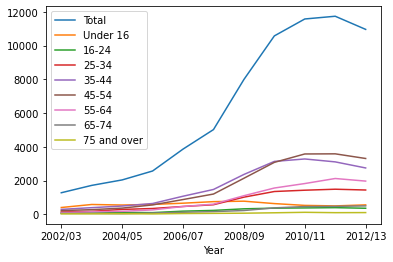

In [301]:
df_obes.plot()

<AxesSubplot:xlabel='Year'>

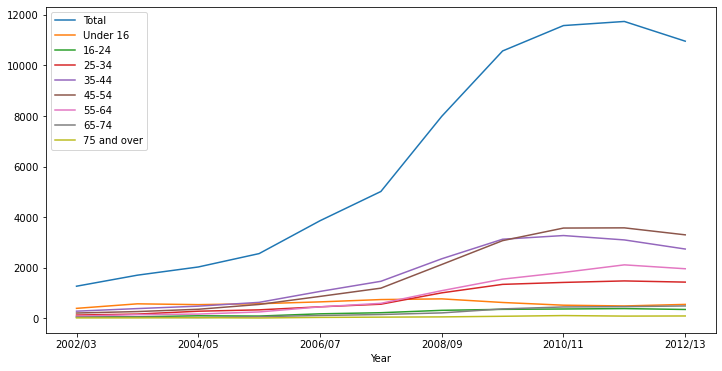

In [302]:
# figsize
df_obes.plot(figsize=(12,6))

<AxesSubplot:xlabel='Year'>

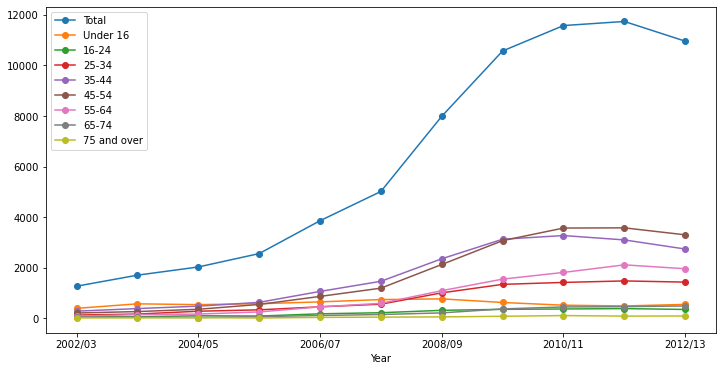

In [303]:
#marker

df_obes.plot(figsize=(12,6), marker="o")

<AxesSubplot:xlabel='Year'>

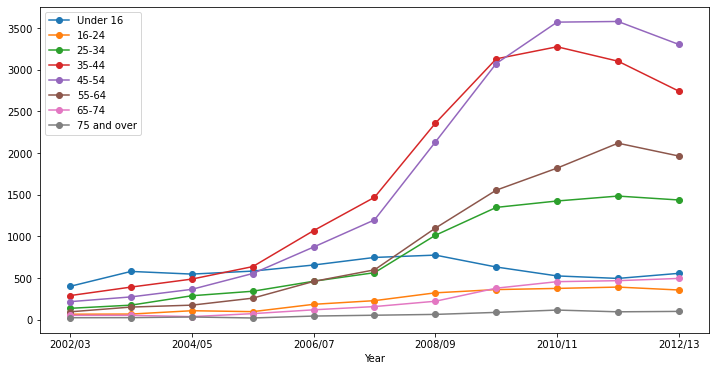

In [304]:
# kolom total jangan ikutan di plot
df_obes.drop(columns=["Total"]).plot(figsize=(12,6), marker="o")

In [305]:
# Apakah anak anak makin banyak yang bertambah obesitas
# tidak, terlihat dari plot data obes.xls kalau jumlah anak anak (< 16) yang obesitas tidak banyak berubah sejak 2002
# sementara, semakin banyak orang di umur 35-54 yang menjadi obesitas
# malahan kita bisa bilang kalau orang dewasa semakin banyak yang obesitas

# latihan
# coba import data obes.xls
# rapikan datanya sehingga kt bisa plot
# umur 35-44 dan umur <16 tahun


In [306]:
df_obes = pd.read_excel("dataset/obes.xls", 
                            sheet_name="7.2",
                            skiprows=4,
                            skipfooter=14)

df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [307]:
df_obes = df_obes.dropna()
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [308]:
df_obes = df_obes.set_index("Unnamed: 0")
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Unnamed: 0,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [309]:
df_obes.index.name = "Year"
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

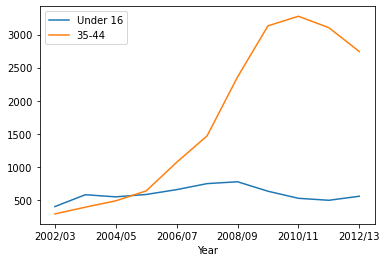

In [310]:
kolom = ["Under 16", "35-44"]

df_obes[kolom].plot()

<AxesSubplot:xlabel='Year'>

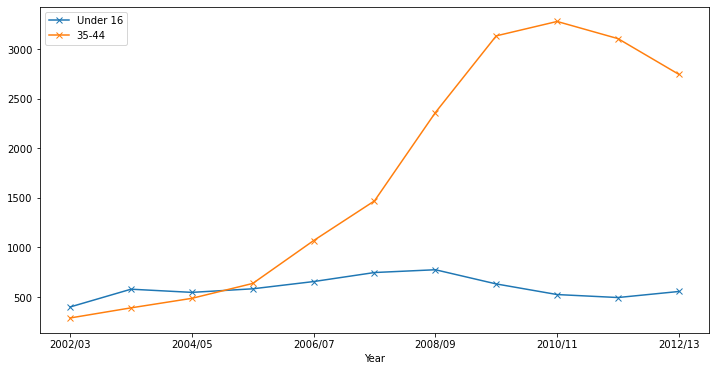

In [311]:
df_obes[kolom].plot(figsize=(12,6), marker="x")

In [312]:
# plot ini menunjukkan kalau ada jauh lebih banyak orang yang umur 35-44 yang obesitas
# dibandingkan anak dibawah 16 tahun

# Time Series

In [313]:
df_rng = pd.date_range(start="01/01/2022", end="06/08/2022", freq="D")

In [314]:
df_rng = pd.DataFrame({"Date": df_rng})
df_rng

,Date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
154,2022-06-04
155,2022-06-05
156,2022-06-06
157,2022-06-07


In [315]:
# misal ini adalah data jumlah visitor website kita per hari
df_rng["Visitors"] = np.random.randint(0, 100, len(df_rng["Date"]))

In [316]:
df_rng

,Date,Visitors
0,2022-01-01,15
1,2022-01-02,73
2,2022-01-03,6
3,2022-01-04,36
4,2022-01-05,19
...,...,...
154,2022-06-04,86
155,2022-06-05,17
156,2022-06-06,58
157,2022-06-07,42


In [317]:
df_rng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      159 non-null    datetime64[ns]
 1   Visitors  159 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.0 KB


In [318]:
df_rng = df_rng.set_index("Date")

In [319]:
df_rng

,Visitors
Date,
2022-01-01,15
2022-01-02,73
2022-01-03,6
2022-01-04,36
2022-01-05,19
...,...
2022-06-04,86
2022-06-05,17
2022-06-06,58


In [320]:
# convert format tanggal ke format yang kita mua
df_rng.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
               '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06',
               '2022-06-07', '2022-06-08'],
              dtype='datetime64[ns]', name='Date', length=159, freq=None)

In [321]:
# strftime, convert tanggal jadi string ke format yang kita mau
new_dates = [datetime.strftime(x,'%d-%B-%Y') for x in df_rng.index]
new_dates

['01-January-2022',
 '02-January-2022',
 '03-January-2022',
 '04-January-2022',
 '05-January-2022',
 '06-January-2022',
 '07-January-2022',
 '08-January-2022',
 '09-January-2022',
 '10-January-2022',
 '11-January-2022',
 '12-January-2022',
 '13-January-2022',
 '14-January-2022',
 '15-January-2022',
 '16-January-2022',
 '17-January-2022',
 '18-January-2022',
 '19-January-2022',
 '20-January-2022',
 '21-January-2022',
 '22-January-2022',
 '23-January-2022',
 '24-January-2022',
 '25-January-2022',
 '26-January-2022',
 '27-January-2022',
 '28-January-2022',
 '29-January-2022',
 '30-January-2022',
 '31-January-2022',
 '01-February-2022',
 '02-February-2022',
 '03-February-2022',
 '04-February-2022',
 '05-February-2022',
 '06-February-2022',
 '07-February-2022',
 '08-February-2022',
 '09-February-2022',
 '10-February-2022',
 '11-February-2022',
 '12-February-2022',
 '13-February-2022',
 '14-February-2022',
 '15-February-2022',
 '16-February-2022',
 '17-February-2022',
 '18-February-2022',
 '

In [322]:
# strptime convert string ke datetime object, string nya harus dalam bentuk format sesuai
new_dates2 = [datetime.strptime(x,'%d-%B-%Y') for x in new_dates]
new_dates2

[datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 1, 2, 0, 0),
 datetime.datetime(2022, 1, 3, 0, 0),
 datetime.datetime(2022, 1, 4, 0, 0),
 datetime.datetime(2022, 1, 5, 0, 0),
 datetime.datetime(2022, 1, 6, 0, 0),
 datetime.datetime(2022, 1, 7, 0, 0),
 datetime.datetime(2022, 1, 8, 0, 0),
 datetime.datetime(2022, 1, 9, 0, 0),
 datetime.datetime(2022, 1, 10, 0, 0),
 datetime.datetime(2022, 1, 11, 0, 0),
 datetime.datetime(2022, 1, 12, 0, 0),
 datetime.datetime(2022, 1, 13, 0, 0),
 datetime.datetime(2022, 1, 14, 0, 0),
 datetime.datetime(2022, 1, 15, 0, 0),
 datetime.datetime(2022, 1, 16, 0, 0),
 datetime.datetime(2022, 1, 17, 0, 0),
 datetime.datetime(2022, 1, 18, 0, 0),
 datetime.datetime(2022, 1, 19, 0, 0),
 datetime.datetime(2022, 1, 20, 0, 0),
 datetime.datetime(2022, 1, 21, 0, 0),
 datetime.datetime(2022, 1, 22, 0, 0),
 datetime.datetime(2022, 1, 23, 0, 0),
 datetime.datetime(2022, 1, 24, 0, 0),
 datetime.datetime(2022, 1, 25, 0, 0),
 datetime.datetime(2022, 1, 26, 0,

In [323]:
# data time datetime bisa kita gunakan dengan lebih bebas dibanding string
# karena kita bisa minta waktu tertentu, dari tahun, bulan, tanggal, hari, jam, dan lainnya

df_rng.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2022-01-01 to 2022-06-08
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Visitors  159 non-null    int32
dtypes: int32(1)
memory usage: 1.9 KB


In [324]:
# khusus tanggal 2, day 2
df_rng[df_rng.index.day == 2]

,Visitors
Date,
2022-01-02,73
2022-02-02,9
2022-03-02,19
2022-04-02,75
2022-05-02,28
2022-06-02,25


In [325]:
# khusus hari senin, weekday 0
df_rng[df_rng.index.weekday == 0]

,Visitors
Date,
2022-01-03,6
2022-01-10,85
2022-01-17,30
2022-01-24,46
2022-01-31,99
2022-02-07,79
2022-02-14,53
2022-02-21,82
2022-02-28,70


In [326]:
# khusus hari sabtu atau minggu, weekday 5 dan 6
# yang visitor lebih dari 50 orang

sabtu = (df_rng.index.weekday == 5)
minggu = (df_rng.index.weekday == 6)
lebih50 = df_rng["Visitors"] > 50

df_rng[(sabtu | minggu) & lebih50]


,Visitors
Date,
2022-01-02,73
2022-01-23,76
2022-01-30,66
2022-02-05,60
2022-02-06,99
2022-02-12,95
2022-02-20,98
2022-03-05,98
2022-03-20,94


In [327]:
# indexing dan slicing tanggal tertentu juga bisa

# February saja
df_rng.loc["2022-02"]

,Visitors
Date,
2022-02-01,40
2022-02-02,9
2022-02-03,87
2022-02-04,68
2022-02-05,60
2022-02-06,99
2022-02-07,79
2022-02-08,56
2022-02-09,40


In [328]:
# tanggal tertentu, valentines 2022
df_rng.loc["2022-02-14"]

Visitors    53
Name: 2022-02-14 00:00:00, dtype: int32

In [329]:
# ambil bbrp tanggal, misalkan 6 dan 8 June 2022
df_rng.loc[["2022-06-06", "2022-06-08"]]

,Visitors
Date,
2022-06-06,58
2022-06-08,84


<AxesSubplot:xlabel='Date'>

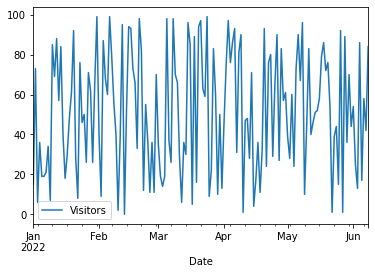

In [330]:
# data kita plot untuk lihat trend website kita
df_rng.plot()

In [331]:
# resample
# bisa lihat datanya setelah dicampur menjadi per jeda waktu tertentu
# per minggu, bulan, tahun, per berapa jam
# contoh, kita buat resample per bulan, untuk total visitor per bulan

df_rng.resample("M").sum()

,Visitors
Date,
2022-01-31,1460
2022-02-28,1498
2022-03-31,1532
2022-04-30,1655
2022-05-31,1659
2022-06-30,379


<AxesSubplot:xlabel='Date'>

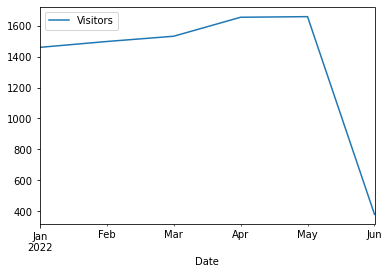

In [332]:
df_rng.resample("M").sum().plot()

In [333]:
# contoh, kita lihat rata-rata visitor per 10 hari

df_rng.resample("10D").mean()

,Visitors
Date,
2022-01-01,31.5
2022-01-11,58.7
2022-01-21,45.9
2022-01-31,63.7
2022-02-10,54.8
2022-02-20,44.7
2022-03-02,47.5
2022-03-12,55.4
2022-03-22,46.8


<AxesSubplot:xlabel='Date'>

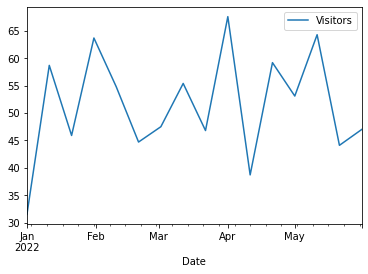

In [334]:
df_rng.resample("10D").mean().plot()

In [335]:
# rolling sum
# menambahkan data beberapa waktu terakhir jadi satu

# contoh, kita mau lihat total visitor 7 hari terakhir, setiap harinya
df_rng["rolling 7d"] = df_rng["Visitors"].rolling("7D").sum()


In [336]:
df_rng.head(10)

,Visitors,rolling 7d
Date,,
2022-01-01,15,15.0
2022-01-02,73,88.0
2022-01-03,6,94.0
2022-01-04,36,130.0
2022-01-05,19,149.0
2022-01-06,19,168.0
2022-01-07,21,189.0
2022-01-08,34,208.0
2022-01-09,7,142.0


In [337]:
# latihan dengan data asli
# data penggunaan energy di German

df_energy = pd.read_csv("dataset/opsd_germany_daily.csv")
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [338]:
df_energy.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [339]:
df_energy.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [340]:
# convert date jadi tipe data datetime, lalu pakai sebagai index
df_energy["Date"] = pd.to_datetime(df_energy["Date"])

In [341]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [342]:
df_energy = df_energy.set_index("Date")

In [343]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [344]:
# penggunaan energy di German apakah ada kebiasaan tertentu
# per tahun apakah makin banyaj
# per bulan apakah ada bulan bulan yang lebih hemat atau boros
# per minggu, apakah ada hari hari yang lebih boros energy daripada hari lainnya

# kita tambahkan 3 kolom baru masing-masing untuk tahun, bulan, dan hari weekday (senin selasa ...)

In [345]:
df_energy["Year"] = df_energy.index.year
df_energy["Month"] = df_energy.index.month
df_energy["Weekday"] = df_energy.index.weekday

In [346]:
df_energy

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


<AxesSubplot:xlabel='Date'>

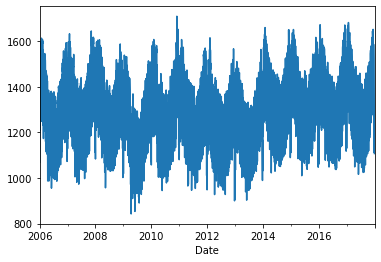

In [347]:
# bikin plot pemakaian energy
df_energy["Consumption"].plot()

<AxesSubplot:xlabel='Year'>

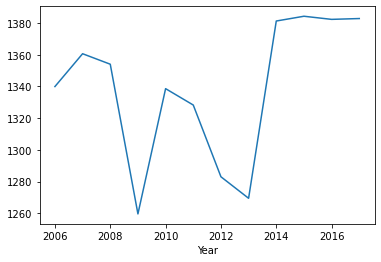

In [348]:
# bikin plot rata-rata pemakaian energy per tahun
df_energy.groupby("Year")["Consumption"].mean().plot()

<AxesSubplot:xlabel='Year'>

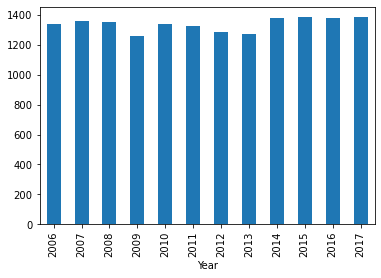

In [349]:

df_energy.groupby("Year")["Consumption"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Month'>

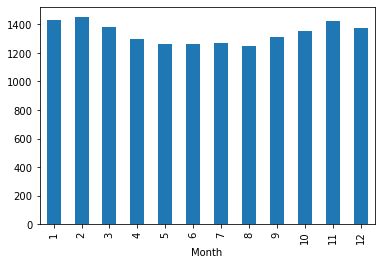

In [350]:
# pemakaian per bulan

df_energy.groupby("Month")["Consumption"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Month'>

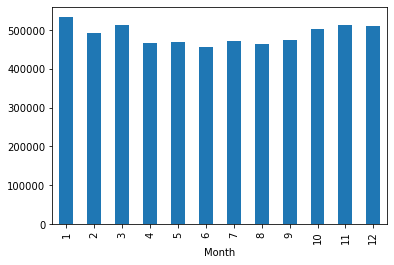

In [351]:

df_energy.groupby("Month")["Consumption"].sum().plot(kind="bar")

<AxesSubplot:xlabel='Month'>

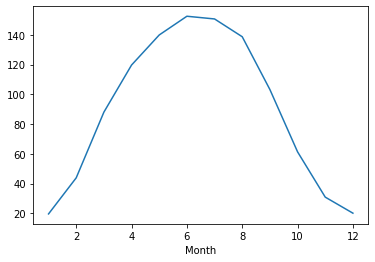

In [352]:
# bagaimana kalau tenaga surya, solar power

df_energy.groupby("Month")["Solar"].mean().plot()

<AxesSubplot:xlabel='Month'>

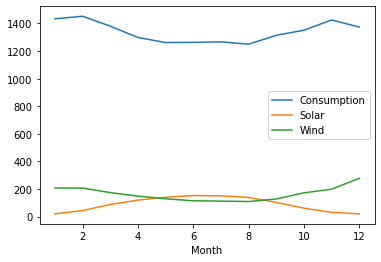

In [353]:

df_energy.groupby("Month")[["Consumption", "Solar", "Wind"]].mean().plot()

<AxesSubplot:xlabel='Month'>

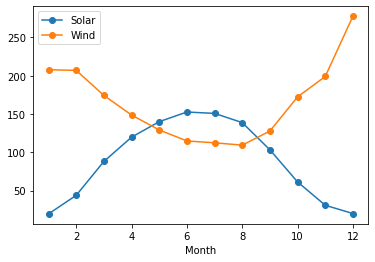

In [354]:

df_energy.groupby("Month")[["Solar", "Wind"]].mean().plot(marker="o")

<AxesSubplot:xlabel='Year'>

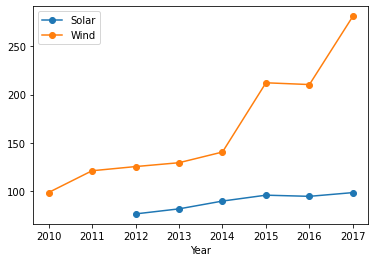

In [355]:

df_energy.groupby("Year")[["Solar", "Wind"]].mean().plot(marker="o")

<AxesSubplot:xlabel='Date'>

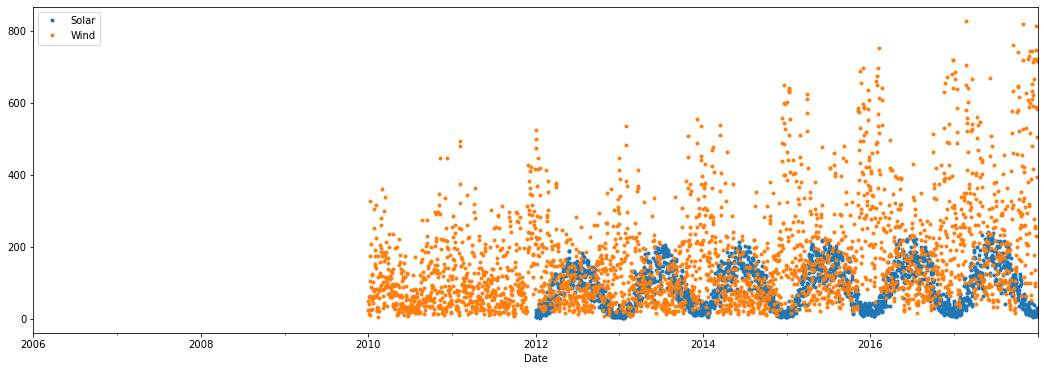

In [356]:
# kalau plot titik yang banyak, garisnya bisa kita "hapus"
# sisain marker saja
df_energy[["Solar", "Wind"]].plot(marker=".", linestyle="none", figsize=(18,6))

In [357]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   Year         4383 non-null   int64  
 5   Month        4383 non-null   int64  
 6   Weekday      4383 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 273.9 KB


<AxesSubplot:xlabel='Date'>

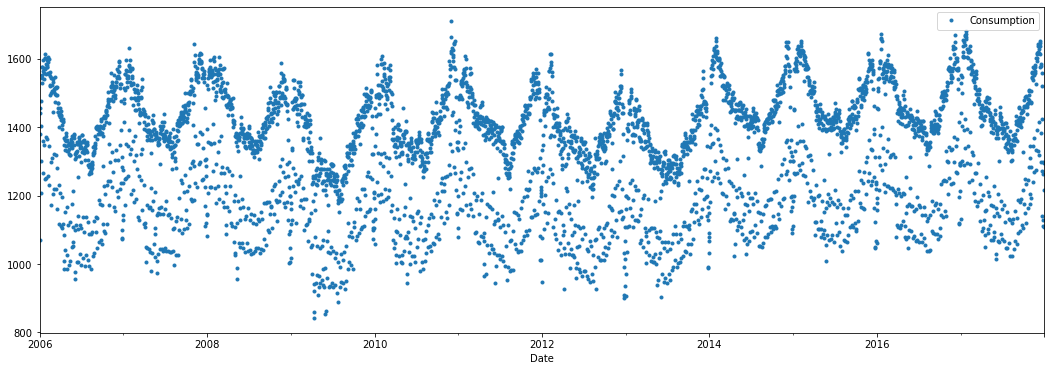

In [358]:

df_energy[["Consumption"]].plot(marker=".", linestyle="none", figsize=(18,6))

<AxesSubplot:xlabel='Weekday'>

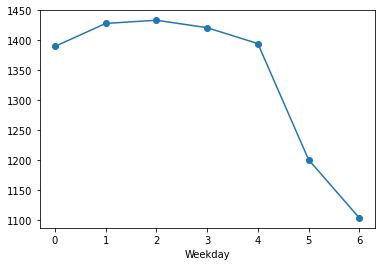

In [359]:
# apakah ada hari tertentu diaman pemakaian energy lebih daripada hari lain


df_energy.groupby("Weekday")["Consumption"].mean().plot(marker="o")

<AxesSubplot:xlabel='Date'>

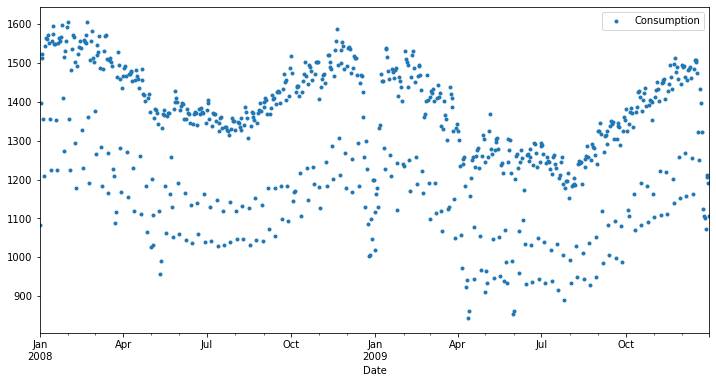

In [360]:
# lihat data 1 tahun saja

df_energy.loc["2008":"2009", ["Consumption"]].plot(marker=".", linestyle="none", figsize=(12,6))

In [361]:
# resample data 7 hari jadi 1 titik
df_energy_weekly = df_energy.loc["2008":"2009", ["Consumption"]].resample("7D").sum()
df_energy_weekly

,Consumption
Date,
2008-01-01,9623.601
2008-01-08,10388.125
2008-01-15,10398.800
2008-01-22,10489.142
2008-01-29,10346.740
...,...
2009-12-01,9819.381
2009-12-08,9817.296
2009-12-15,9999.451


<AxesSubplot:xlabel='Date'>

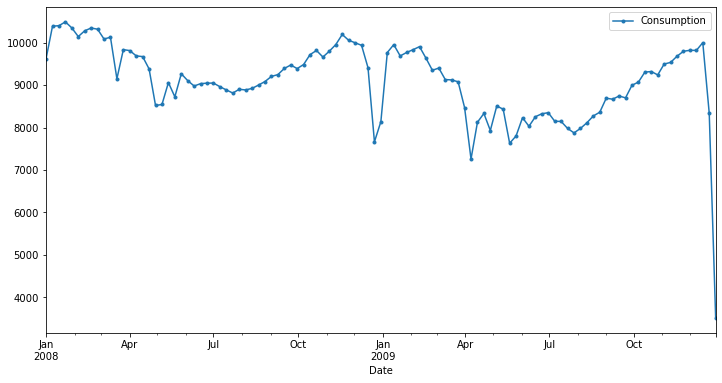

In [362]:
df_energy_weekly.plot(marker=".", figsize=(12,6))

<AxesSubplot:xlabel='Date'>

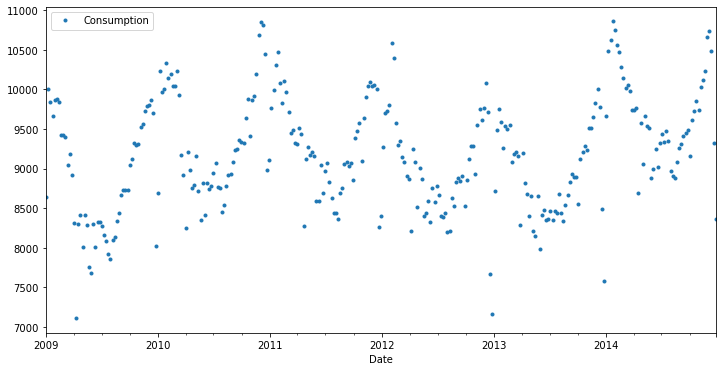

In [363]:
df_energy_weekly = df_energy.loc["2009":"2014",["Consumption"]].resample("7D").sum()
df_energy_weekly.plot(marker=".", linestyle="none", figsize=(12,6))

<AxesSubplot:xlabel='Date'>

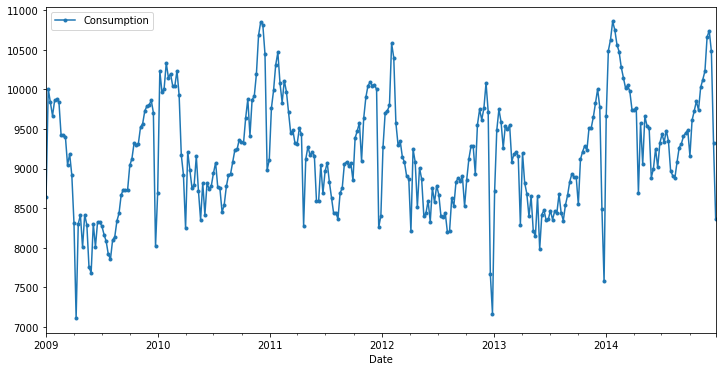

In [364]:
df_energy_weekly.plot(marker=".", figsize=(12,6))